In [4]:
import pandas as pd
import os

os.listdir()
train = pd.read_csv('train.csv')
train.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


In [14]:
train.shape

(3865, 80)

In [23]:
from sklearn.model_selection import train_test_split
df = train.select_dtypes(include=["float"])
df =df.dropna()
x = df.drop("y",1)
y =df.y
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state =1)

In [24]:
df.shape

(334, 78)

In [31]:
# Modeling
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Test data
test = pd.read_csv('test.csv')
test =test[x_train.columns]

In [38]:
test =test.fillna(0)
pred = model.predict(test)


    

In [61]:
ss = pd.DataFrame({
    'Index':test.index,
    'pred':pred,
    'opt_pred':0
})
ss.head()

,Index,pred,opt_pred
0,0,0.089830,56.116723
1,1,0.103526,56.116723
2,2,0.102605,56.116723
3,3,0.077994,56.116723
4,4,0.117215,56.116723


In [215]:
H = []
for i in test['existence expectancy index']: 
    if i <0.7:
        H.append(round(5600/71,1))
        
    else:
        H.append(round(44000/813,1))
        
ss["opt_pred"] =H
ss.head()
sum(ss[test['existence expectancy index']<0.7].opt_pred)

5601.899999999996

In [216]:
test[test['existence expectancy index']<0.7].shape
sum(H)

49909.79999999919

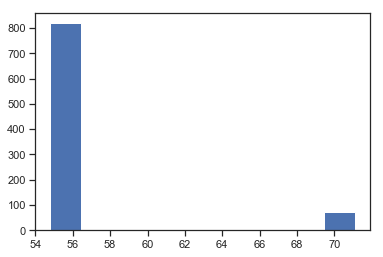

In [210]:
plt.hist(H)
plt.show()


In [217]:
ss.to_csv("files\\regression_model.csv",index =False)